<a href="https://colab.research.google.com/github/PoojaSreeOviya/DEEP_LEARNING_MINI_PROJECT/blob/main/DL_MINI_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMED ENTITY RECOGNITION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import tensorflow as tf
import sklearn
from sklearn import model_selection

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ner.csv',encoding='latin1')
data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
data.dropna(inplace=True)
print("Number of rows : ",data.shape[0]," and the number of columns : ",data.shape[1])

Number of rows :  47959  and the number of columns :  4


In [ ]:
for i in range(len(data)):
   pos = ast.literal_eval(data['POS'][i])
   tags = ast.literal_eval(data['Tag'][i])
   data['POS'][i] = [str(word) for word in pos]
   data['Tag'][i] = [str(word.upper()) for word in tags]

In [ ]:
print (data)

            Sentence #                                           Sentence  \
0          Sentence: 1  Thousands of demonstrators have marched throug...   
1          Sentence: 2  Families of soldiers killed in the conflict jo...   
2          Sentence: 3  They marched from the Houses of Parliament to ...   
3          Sentence: 4  Police put the number of marchers at 10,000 wh...   
4          Sentence: 5  The protest comes on the eve of the annual con...   
...                ...                                                ...   
47954  Sentence: 47955  Indian border security forces are accusing the...   
47955  Sentence: 47956  Indian officials said no one was injured in Sa...   
47956  Sentence: 47957  Two more landed in fields belonging to a nearb...   
47957  Sentence: 47958  They say not all of the rockets exploded upon ...   
47958  Sentence: 47959    Indian forces said they responded to the attack   

                                                     POS  \
0      [NNS, IN

In [ ]:
data["Tag"][0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GPE',
 'O',
 'O',
 'O',
 'O',
 'O']

In [ ]:
df_final = data[['Sentence','Tag']]

df_train,df_test = model_selection.train_test_split(df_final,test_size=0.2,random_state=42)
len(df_train),len(df_test)

(38367, 9592)

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense,Input,Embedding,Flatten
from keras.models import Model
from keras.losses import SparseCategoricalCrossentropy

In [ ]:
train_targets = list(df_train.Tag.values)
test_targets = list(df_test.Tag.values)

tokenizer = Tokenizer(lower=False,oov_token="UNK")
tokenizer.fit_on_texts(df_train['Sentence'])

train_inputs = tokenizer.texts_to_sequences(df_train['Sentence'])
test_inputs = tokenizer.texts_to_sequences(df_test['Sentence'])

In [ ]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens "%V)

Found 28755 unique tokens 


In [ ]:
train_tags = set([val for sublist in train_targets for val in sublist])
test_tags = set([val for sublist in test_targets for val in sublist])

print("Unique NER tags in train set: ",train_tags)
print("Unique NER tags in test set: ",test_tags)

Unique NER tags in train set:  {'B-GPE', 'B-GEO', 'I-PER', 'I-EVE', 'I-ART', 'O', 'B-NAT', 'I-NAT', 'I-GEO', 'B-ART', 'I-GPE', 'I-TIM', 'B-TIM', 'B-EVE', 'I-ORG', 'B-PER', 'B-ORG'}
Unique NER tags in test set:  {'B-GPE', 'B-GEO', 'I-PER', 'I-EVE', 'I-ART', 'O', 'B-NAT', 'B-ART', 'I-GEO', 'I-NAT', 'I-GPE', 'I-TIM', 'B-TIM', 'B-EVE', 'I-ORG', 'B-PER', 'B-ORG'}


In [ ]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(train_targets)
train_tgt_int = tag_tokenizer.texts_to_sequences(train_targets)
test_tgt_int = tag_tokenizer.texts_to_sequences(test_targets)

In [ ]:
max_length_train = max(len(sent) for sent in train_inputs)
max_length_test = max(len(sent) for sent in test_inputs)
max_length = max(max_length_train,max_length_test)

In [ ]:
train_inputs_final = pad_sequences(train_inputs,maxlen=max_length,padding="post")
print("Shape of train inputs: ",train_inputs_final.shape)

Shape of train inputs:  (38367, 89)


In [ ]:
test_inputs_final = pad_sequences(test_inputs,maxlen=max_length,padding="post")
print("Shape of test inputs: ",test_inputs_final.shape)

Shape of test inputs:  (9592, 89)


In [ ]:
train_targets_final = pad_sequences(train_tgt_int,maxlen=max_length,padding="post")
print("Shape of train targets: ",train_targets_final.shape)

Shape of train targets:  (38367, 89)


In [ ]:
test_targets_final = pad_sequences(test_tgt_int,maxlen=max_length,padding="post")
print("Shape of test targets: ",test_targets_final.shape)

Shape of test targets:  (9592, 89)


In [ ]:
K = len(tag_tokenizer.word_index)  +1
K
vector_size = 16

RNN

In [ ]:
from keras.layers import SimpleRNN

i = Input(shape=(max_length,))
x = Embedding(input_dim=V + 1, output_dim=vector_size, mask_zero=True)(i)
x = SimpleRNN(32, return_sequences=True)(x)
x = Dense(K)(x)

model_rnn = Model(i, x)
model_rnn.compile(optimizer="adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model_rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 89)]              0         
                                                                 
 embedding (Embedding)       (None, 89, 16)            460096    
                                                                 
 simple_rnn (SimpleRNN)      (None, 89, 32)            1568      
                                                                 
 dense (Dense)               (None, 89, 18)            594       
                                                                 
Total params: 462258 (1.76 MB)
Trainable params: 462258 (1.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train and evaluate RNN model
model_rnn.fit(train_inputs_final, train_targets_final, epochs=10, validation_data=(test_inputs_final, test_targets_final))

Epoch 1/10
1199/1199 [==============================] - 65s 52ms/step - loss: 0.6732 - accuracy: 0.8491 - val_loss: 0.4559 - val_accuracy: 0.8770
Epoch 2/10
1199/1199 [==============================] - 59s 49ms/step - loss: 0.3989 - accuracy: 0.8851 - val_loss: 0.3840 - val_accuracy: 0.8878
Epoch 3/10
1199/1199 [==============================] - 78s 65ms/step - loss: 0.3435 - accuracy: 0.8967 - val_loss: 0.3682 - val_accuracy: 0.8920
Epoch 4/10
1199/1199 [==============================] - 70s 58ms/step - loss: 0.3135 - accuracy: 0.9048 - val_loss: 0.3594 - val_accuracy: 0.8949
Epoch 5/10
1199/1199 [==============================] - 59s 49ms/step - loss: 0.2910 - accuracy: 0.9108 - val_loss: 0.3596 - val_accuracy: 0.8949
Epoch 6/10
1199/1199 [==============================] - 55s 46ms/step - loss: 0.2740 - accuracy: 0.9154 - val_loss: 0.3740 - val_accuracy: 0.8963
Epoch 7/10
1199/1199 [==============================] - 60s 50ms/step - loss: 0.2600 - accuracy: 0.9191 - val_loss: 0.3684 -

MLP

In [ ]:
from keras.layers import TimeDistributed

i = Input(shape=(max_length,))
x = Embedding(input_dim=V + 1, output_dim=vector_size, mask_zero=True)(i)
x = TimeDistributed(Dense(128, activation='relu'))(x)
x = TimeDistributed(Dense(64, activation='relu'))(x)
x = TimeDistributed(Dense(K))(x)

model_mlp = Model(i, x)
model_mlp.compile(optimizer="adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model_mlp.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 89)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 89, 16)            460096    
                                                                 
 time_distributed (TimeDist  (None, 89, 128)           2176      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 89, 64)            8256      
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 89, 18)            1170      
 stributed)                                                      
                                                           

In [ ]:
# Train and evaluate MLP model
model_mlp.fit(train_inputs_final, train_targets_final, epochs=10, validation_data=(test_inputs_final, test_targets_final))

Epoch 1/10
1199/1199 [==============================] - 23s 18ms/step - loss: 0.6151 - accuracy: 0.8586 - val_loss: 0.4790 - val_accuracy: 0.8714
Epoch 2/10
1199/1199 [==============================] - 22s 18ms/step - loss: 0.4528 - accuracy: 0.8749 - val_loss: 0.4690 - val_accuracy: 0.8728
Epoch 3/10
1199/1199 [==============================] - 20s 17ms/step - loss: 0.4320 - accuracy: 0.8792 - val_loss: 0.4709 - val_accuracy: 0.8729
Epoch 4/10
1199/1199 [==============================] - 21s 18ms/step - loss: 0.4220 - accuracy: 0.8806 - val_loss: 0.4746 - val_accuracy: 0.8733
Epoch 5/10
1199/1199 [==============================] - 22s 19ms/step - loss: 0.4158 - accuracy: 0.8808 - val_loss: 0.4758 - val_accuracy: 0.8733
Epoch 6/10
1199/1199 [==============================] - 21s 17ms/step - loss: 0.4119 - accuracy: 0.8810 - val_loss: 0.4769 - val_accuracy: 0.8731
Epoch 7/10
1199/1199 [==============================] - 22s 18ms/step - loss: 0.4087 - accuracy: 0.8813 - val_loss: 0.4794 -

CNN

In [ ]:
from keras.layers import Conv1D, TimeDistributed

i = Input(shape=(max_length,))
x = Embedding(input_dim=V + 1, output_dim=vector_size, mask_zero=True)(i)
x = Conv1D(32, 3, activation='relu', padding='same')(x)
x = Conv1D(32, 3, activation='relu', padding='same')(x)
x = TimeDistributed(Dense(32, activation='relu'))(x)
x = TimeDistributed(Dense(K))(x)

model_cnn = Model(i, x)
model_cnn.compile(optimizer="adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model_cnn.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 89)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 89, 16)            460096    
                                                                 
 conv1d (Conv1D)             (None, 89, 32)            1568      
                                                                 
 conv1d_1 (Conv1D)           (None, 89, 32)            3104      
                                                                 
 time_distributed_3 (TimeDi  (None, 89, 32)            1056      
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 89, 18)            594       
 stributed)                                                

In [ ]:
# Train and evaluate CNN model
model_cnn.fit(train_inputs_final, train_targets_final, epochs=10, validation_data=(test_inputs_final, test_targets_final))

Epoch 1/10
1199/1199 [==============================] - 23s 18ms/step - loss: 0.2653 - accuracy: 0.9524 - val_loss: 0.1319 - val_accuracy: 0.9622
Epoch 2/10
1199/1199 [==============================] - 23s 19ms/step - loss: 0.1220 - accuracy: 0.9637 - val_loss: 0.1233 - val_accuracy: 0.9633
Epoch 3/10
1199/1199 [==============================] - 21s 17ms/step - loss: 0.1107 - accuracy: 0.9663 - val_loss: 0.1217 - val_accuracy: 0.9637
Epoch 4/10
1199/1199 [==============================] - 21s 17ms/step - loss: 0.1037 - accuracy: 0.9682 - val_loss: 0.1235 - val_accuracy: 0.9636
Epoch 5/10
1199/1199 [==============================] - 23s 19ms/step - loss: 0.0986 - accuracy: 0.9696 - val_loss: 0.1250 - val_accuracy: 0.9634
Epoch 6/10
1199/1199 [==============================] - 21s 18ms/step - loss: 0.0948 - accuracy: 0.9707 - val_loss: 0.1281 - val_accuracy: 0.9633
Epoch 7/10
1199/1199 [==============================] - 23s 19ms/step - loss: 0.0919 - accuracy: 0.9716 - val_loss: 0.1303 -

LSTM

In [ ]:
from keras.layers import Bidirectional, LSTM

i = Input(shape=(max_length,))
x = Embedding(input_dim=V + 1, output_dim=vector_size, mask_zero=True)(i)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Dense(K)(x)

model_lstm = Model(i, x)
model_lstm.compile(optimizer="adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model_lstm.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 89)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 89, 16)            460096    
                                                                 
 bidirectional (Bidirection  (None, 89, 64)            12544     
 al)                                                             
                                                                 
 dense_6 (Dense)             (None, 89, 18)            1170      
                                                                 
Total params: 473810 (1.81 MB)
Trainable params: 473810 (1.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train and evaluate LSTM model
model_lstm.fit(train_inputs_final, train_targets_final, epochs=10, validation_data=(test_inputs_final, test_targets_final))

Epoch 1/10
1199/1199 [==============================] - 159s 121ms/step - loss: 0.6780 - accuracy: 0.8449 - val_loss: 0.4887 - val_accuracy: 0.8646
Epoch 2/10
1199/1199 [==============================] - 141s 118ms/step - loss: 0.3951 - accuracy: 0.8821 - val_loss: 0.3585 - val_accuracy: 0.8903
Epoch 3/10
1199/1199 [==============================] - 142s 118ms/step - loss: 0.3148 - accuracy: 0.8988 - val_loss: 0.3254 - val_accuracy: 0.8980
Epoch 4/10
1199/1199 [==============================] - 159s 133ms/step - loss: 0.2727 - accuracy: 0.9102 - val_loss: 0.3126 - val_accuracy: 0.9022
Epoch 5/10
1199/1199 [==============================] - 141s 118ms/step - loss: 0.2435 - accuracy: 0.9186 - val_loss: 0.3091 - val_accuracy: 0.9042
Epoch 6/10
1199/1199 [==============================] - 141s 117ms/step - loss: 0.2212 - accuracy: 0.9254 - val_loss: 0.3118 - val_accuracy: 0.9052
Epoch 7/10
1199/1199 [==============================] - 141s 117ms/step - loss: 0.2046 - accuracy: 0.9313 - val_

In [ ]:
from keras.layers import GRU

i = Input(shape=(max_length,))
x = Embedding(input_dim=V + 1, output_dim=vector_size, mask_zero=True)(i)
x = GRU(32, return_sequences=True)(x)
x = Dense(K)(x)

model_gru = Model(i, x)
model_gru.compile(optimizer="adam", loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model_gru.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 89)]              0         
                                                                 
 embedding_5 (Embedding)     (None, 89, 16)            460096    
                                                                 
 gru_1 (GRU)                 (None, 89, 32)            4800      
                                                                 
 dense_8 (Dense)             (None, 89, 18)            594       
                                                                 
Total params: 465490 (1.78 MB)
Trainable params: 465490 (1.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_gru.fit(train_inputs_final, train_targets_final, epochs=10, validation_data=(test_inputs_final, test_targets_final))

Epoch 1/10
1199/1199 [==============================] - 95s 74ms/step - loss: 0.6842 - accuracy: 0.8494 - val_loss: 0.4594 - val_accuracy: 0.8732
Epoch 2/10
1199/1199 [==============================] - 86s 71ms/step - loss: 0.3962 - accuracy: 0.8845 - val_loss: 0.3766 - val_accuracy: 0.8893
Epoch 3/10
1199/1199 [==============================] - 82s 68ms/step - loss: 0.3372 - accuracy: 0.8984 - val_loss: 0.3574 - val_accuracy: 0.8960
Epoch 4/10
1199/1199 [==============================] - 81s 68ms/step - loss: 0.3048 - accuracy: 0.9071 - val_loss: 0.3487 - val_accuracy: 0.8987
Epoch 5/10
1199/1199 [==============================] - 81s 67ms/step - loss: 0.2835 - accuracy: 0.9120 - val_loss: 0.3449 - val_accuracy: 0.8993
Epoch 6/10
1199/1199 [==============================] - 82s 68ms/step - loss: 0.2661 - accuracy: 0.9167 - val_loss: 0.3454 - val_accuracy: 0.8993
Epoch 7/10
1199/1199 [==============================] - 88s 73ms/step - loss: 0.2523 - accuracy: 0.9205 - val_loss: 0.3455 -

**EVALUATION ON SAMPLE SENTENCE ON EACH ALGORITHM**

In [ ]:
sentence = "Polish Prime Minister Jaroslaw Kaczynski has voiced support for the deployment of 10 U.S. missile interceptors in Poland and guidance technology in the Czech Republic ."
predictions = model_rnn.predict(pad_sequences(tokenizer.texts_to_sequences([sentence]), maxlen=max_length, padding="post"))
prediction_ner = np.argmax(predictions, axis=-1)
print("RNN Predictions:", prediction_ner)

1/1 [==============================] - 0s 30ms/step
RNN Predictions: [[8 6 1 1 5 1 1 1 1 1 1 1 1 1 7 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [ ]:
sentence = "Polish Prime Minister Jaroslaw Kaczynski has voiced support for the deployment of 10 U.S. missile interceptors in Poland and guidance technology in the Czech Republic."
predictions = model_mlp.predict(pad_sequences(tokenizer.texts_to_sequences([sentence]), maxlen=max_length, padding="post"))
prediction_ner = np.argmax(predictions, axis=-1)
print("MLP Predictions:", prediction_ner)

1/1 [==============================] - 0s 24ms/step
MLP Predictions: [[8 6 1 1 5 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [ ]:
sentence = "Polish Prime Minister Jaroslaw Kaczynski has voiced support for the deployment of 10 U.S. missile interceptors in Poland and guidance technology in the Czech Republic."
predictions = model_cnn.predict(pad_sequences(tokenizer.texts_to_sequences([sentence]), maxlen=max_length, padding="post"))
prediction_ner = np.argmax(predictions, axis=-1)
print("CNN Predictions:", prediction_ner)

1/1 [==============================] - 0s 26ms/step
CNN Predictions: [[ 0 17  8 17  1  1  0 14  6  6  1  0  0  1  6  3  0  7  6  6  1  0  7  6
   7  7  4 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
sentence = "Polish Prime Minister Jaroslaw Kaczynski has voiced support for the deployment of 10 U.S. missile interceptors in Poland and guidance technology in the Czech Republic ."
predictions = model_lstm.predict(pad_sequences(tokenizer.texts_to_sequences([sentence]), maxlen=max_length, padding="post"))
prediction_ner = np.argmax(predictions, axis=-1)
print("LSTM Predictions:", prediction_ner)

1/1 [==============================] - 0s 53ms/step
LSTM Predictions: [[8 6 5 5 5 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


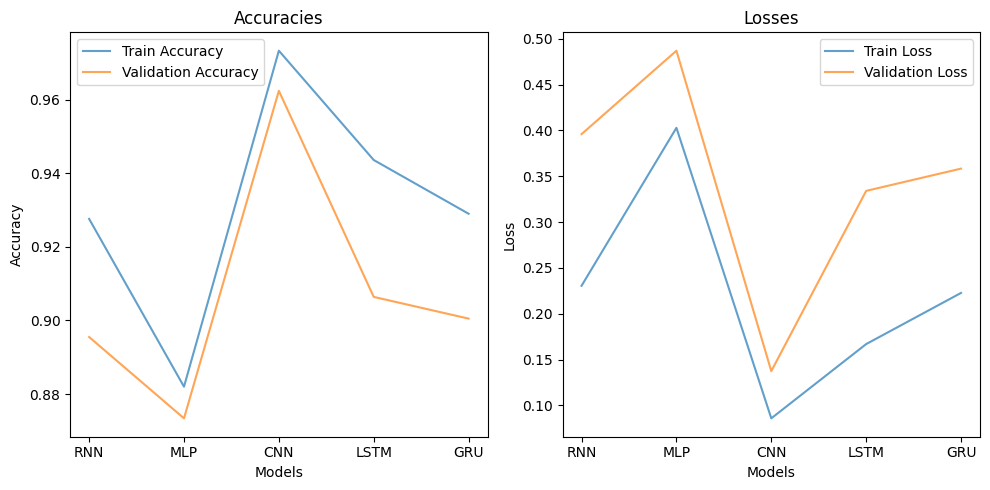

In [ ]:
import matplotlib.pyplot as plt

final_metrics = {
    'RNN': {'train_accuracy': 0.9276, 'val_accuracy': 0.8955, 'train_loss': 0.2305, 'val_loss': 0.3959},
    'MLP': {'train_accuracy': 0.8820, 'val_accuracy': 0.8734, 'train_loss': 0.4028, 'val_loss': 0.4869},
    'CNN': {'train_accuracy': 0.9733, 'val_accuracy': 0.9624, 'train_loss': 0.0859, 'val_loss': 0.1374},
    'LSTM': {'train_accuracy': 0.9436, 'val_accuracy': 0.9064, 'train_loss': 0.1669, 'val_loss': 0.3340},
    'GRU': {'train_accuracy': 0.9290, 'val_accuracy': 0.9005, 'train_loss': 0.2227, 'val_loss': 0.3583},
}

# Extract the data for plotting
models = list(final_metrics.keys())
train_accuracies = [final_metrics[model]['train_accuracy'] for model in models]
val_accuracies = [final_metrics[model]['val_accuracy'] for model in models]
train_losses = [final_metrics[model]['train_loss'] for model in models]
val_losses = [final_metrics[model]['val_loss'] for model in models]

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(models, train_accuracies, label='Train Accuracy', alpha=0.7)
plt.plot(models, val_accuracies, label='Validation Accuracy', alpha=0.7)
plt.title('Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()

# Plot losses
plt.subplot(1, 2, 2)
plt.plot(models, train_losses, label='Train Loss', alpha=0.7)
plt.plot(models, val_losses, label='Validation Loss', alpha=0.7)
plt.title('Losses')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
